In [3]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from sklearn import preprocessing
from keras.preprocessing import image
from sklearn.model_selection import train_test_split

In [4]:
base_dir = '/content/drive/MyDrive/Thesis_Paper/CNN/'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'test')

In [5]:
BATCH_SIZE = 5
IMG_SIZE = (180, 180)

train = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                            shuffle=True,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE)

Found 400 files belonging to 2 classes.


In [6]:
validation = tf.keras.utils.image_dataset_from_directory(validation_dir,
                                                                 shuffle=True,
                                                                 batch_size=BATCH_SIZE,
                                                                 image_size=IMG_SIZE)

Found 100 files belonging to 2 classes.


In [7]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(180,180,3),
                   pooling='avg',classes=2,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)

94781440/94765736 [==============================] - 0s 0us/step


In [8]:
resnet_model.add(tf.keras.layers.Flatten())
resnet_model.add(tf.keras.layers.Dense(512, activation='relu'))
resnet_model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [9]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 1)                 513       
                                                                 
Total params: 24,637,313
Trainable params: 1,049,601
Non-trainable params: 23,587,712
_________________________________________________________________


In [10]:
resnet_model.compile(tf.keras.optimizers.Adam(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

history = resnet_model.fit(train, validation_data=validation, epochs=50)

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


80/80 [==============================] - 128s 1s/step - loss: 0.7058 - accuracy: 0.7350 - val_loss: 0.6004 - val_accuracy: 0.7700
Epoch 2/50
80/80 [==============================] - 7s 79ms/step - loss: 0.1912 - accuracy: 0.9250 - val_loss: 0.6573 - val_accuracy: 0.7900
Epoch 3/50
80/80 [==============================] - 7s 79ms/step - loss: 0.0941 - accuracy: 0.9750 - val_loss: 0.5704 - val_accuracy: 0.8100
Epoch 4/50
80/80 [==============================] - 7s 79ms/step - loss: 0.0526 - accuracy: 0.9850 - val_loss: 0.5140 - val_accuracy: 0.7800
Epoch 5/50
80/80 [==============================] - 7s 79ms/step - loss: 0.0357 - accuracy: 0.9975 - val_loss: 0.5746 - val_accuracy: 0.8100
Epoch 6/50
80/80 [==============================] - 7s 80ms/step - loss: 0.0136 - accuracy: 1.0000 - val_loss: 0.6372 - val_accuracy: 0.8400
Epoch 7/50
80/80 [==============================] - 7s 79ms/step - loss: 0.0058 - accuracy: 1.0000 - val_loss: 0.5769 - val_accuracy: 0.8300
Epoch 8/50
80/80 [======

Text(0.5, 1.0, 'Training and Validation Accuracy (ResNet50)')

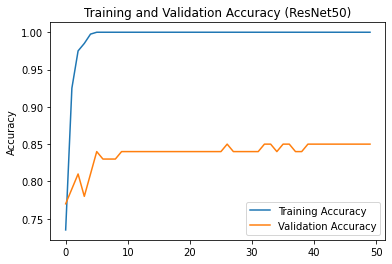

In [11]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy (ResNet50)')

In [13]:
loss, accuracy = resnet_model.evaluate(validation)
print('Test accuracy :', accuracy)

20/20 [==============================] - 1s 43ms/step - loss: 0.8355 - accuracy: 0.8500
Test accuracy : 0.8500000238418579
